In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import metrics
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import MiniBatchKMeans
from sklearn.base import BaseEstimator

In [2]:
# Données de la première partie récupérée
mnist = fetch_openml('mnist_784', version=1)
mnist['target'] = mnist['target'].astype('uint8')
X = mnist['data']
y = mnist['target']

## Méthode PCA

In [3]:
# Utilisation de 10000 valeurs randoms
def reduction(X, y):
    values = np.hstack((X, y.reshape(-1, 1)))
    permut = np.random.permutation(values)
    return permut[:10000, :784], permut[:10000, 784]

X, y = reduction(X, y)

In [4]:
# Réduction de la dimmensionnalité avec PCA sur X
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

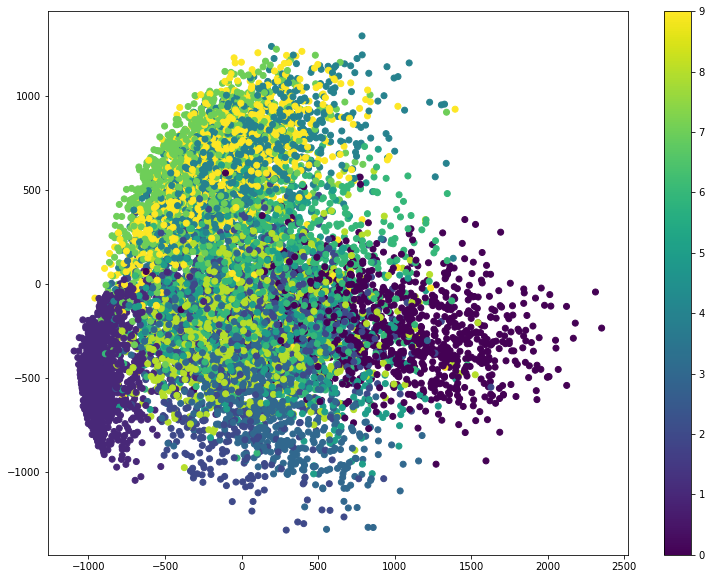

In [5]:
# Affichage des données réduites
plt.figure(figsize=(13,10))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.axis='off'
plt.colorbar()
plt.show()

Non, avec le résultat actuel on ne peut pas conclure sur un résultat précis pour la distribution des instances de MNIST.

## Méthode t-SNE

In [6]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [7]:
X.shape

(10000, 784)

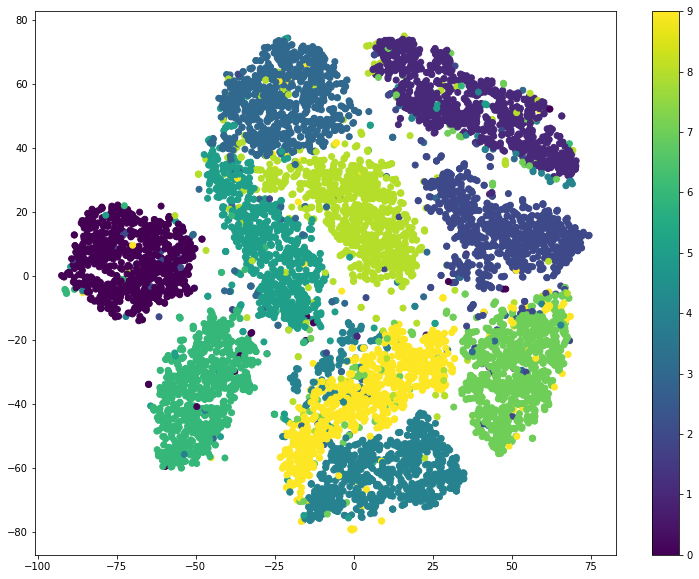

In [8]:
# Affichage des données réduites
plt.figure(figsize=(13,10))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y)
plt.axis='off'
plt.colorbar()
plt.show()

Il y a des chevauchements sur le chiffre 9 et le chiffre 4 qui sont plutôt confondus.

#### Si on compare les résultats entre les méthodes PCA et t-SNE, on remarque que pour PCA le clustering ne fonctionne pas vraiment comme t-SNE.   
#### Pour t-SNE on peut facilement lire le graphique et voir que le clustering est plutôt efficace.